# Series temporais e analises preditivas

In [1]:
#pacotes essencias utilizados durante o curso

install.packages("forecast")
install.packages("ggplot2")

package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alessandra\AppData\Local\Temp\RtmpOW4oKI\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alessandra\AppData\Local\Temp\RtmpOW4oKI\downloaded_packages


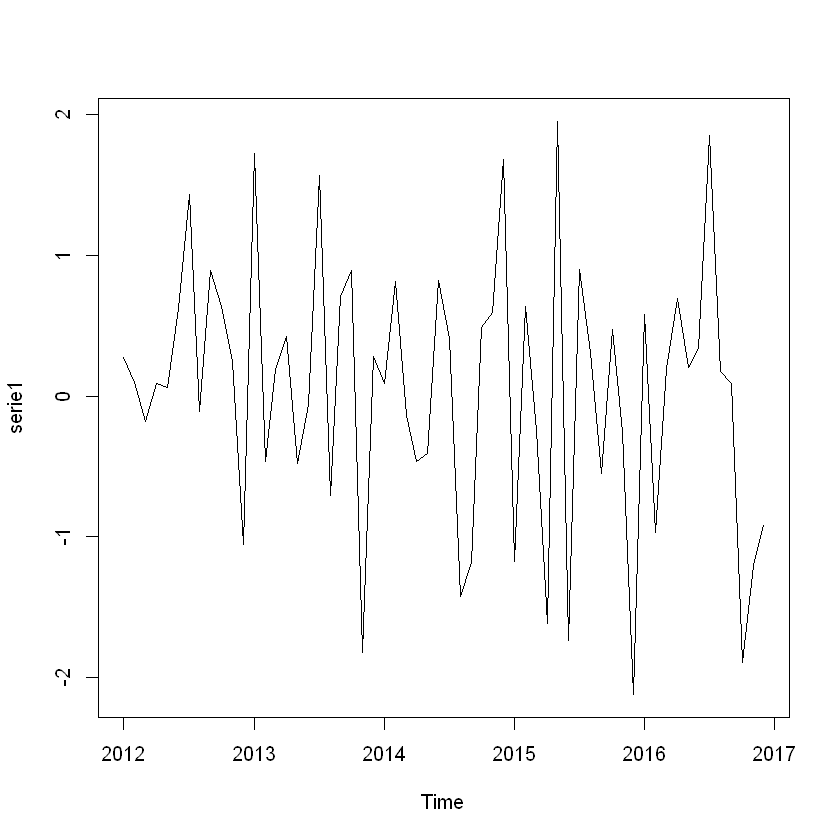

In [3]:
#cria uma serie temporal normalmente distribuida

serie1 = rnorm(60)
serie1 = ts(serie1,start = c(2012,1), end=c(2016,12), frequency=12)
plot(serie1)

In [4]:
#Importa e cria  uma serie temporal

setwd("C:\\Users\\Alessandra\\Repos\\Models_PUC_R\\Datasets")# direciona o R para pasta
getwd() # visualiza a pasta de trabalho do R
dados1 <- read.csv2("Dati_Job_IA.csv") # Leitura do arquivo csv no R

[1] "C:/Users/Alessandra/Repos/Models_PUC_R/Datasets"

[1] "ts"

[1] "ts"

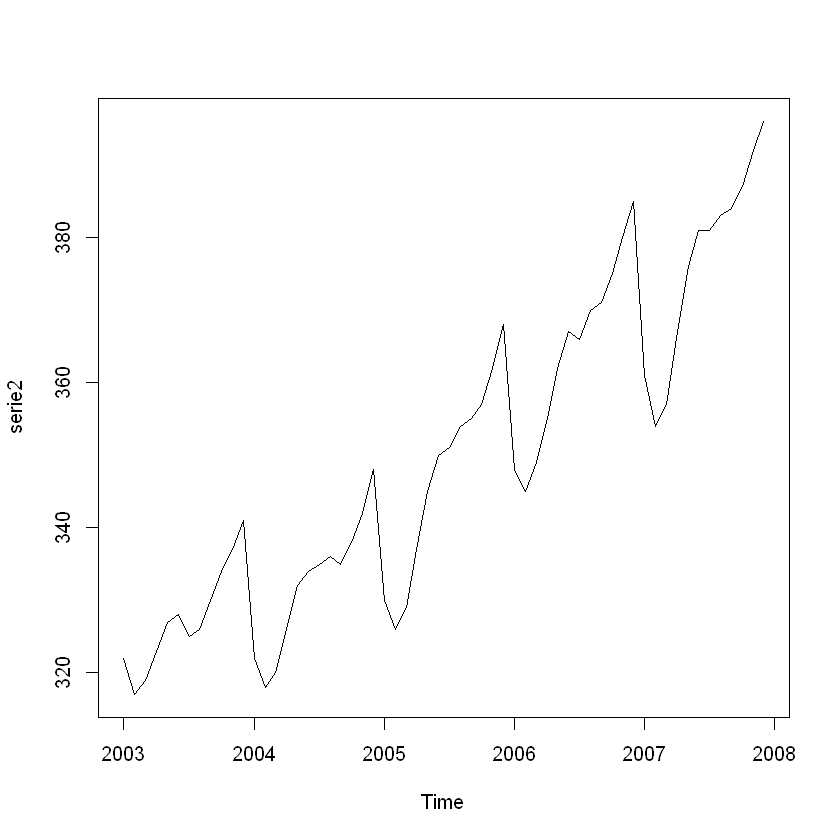

[1] "ts"

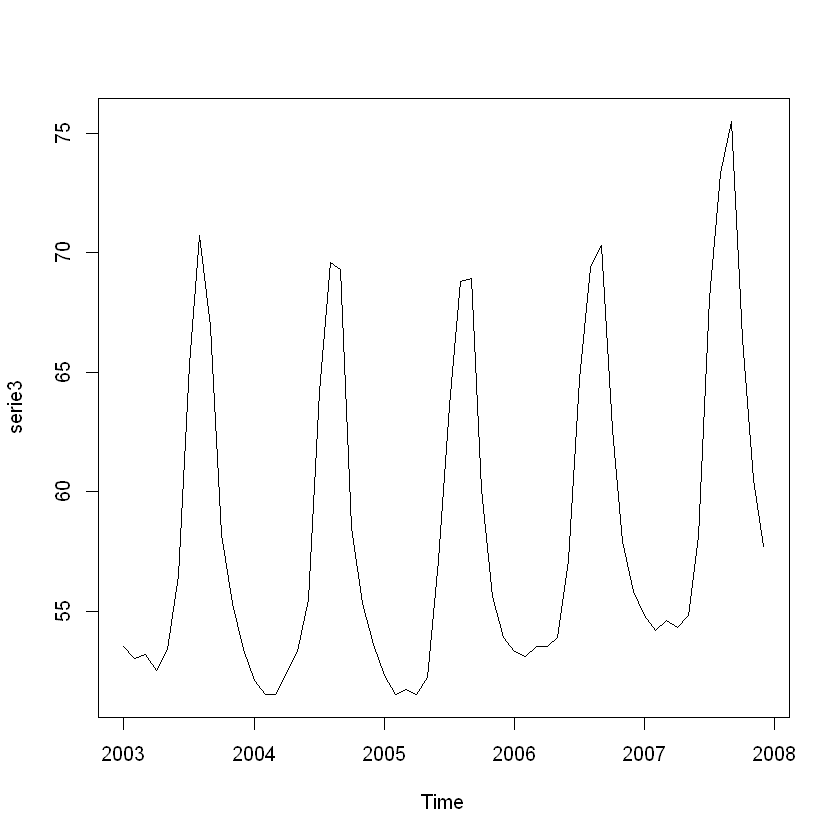

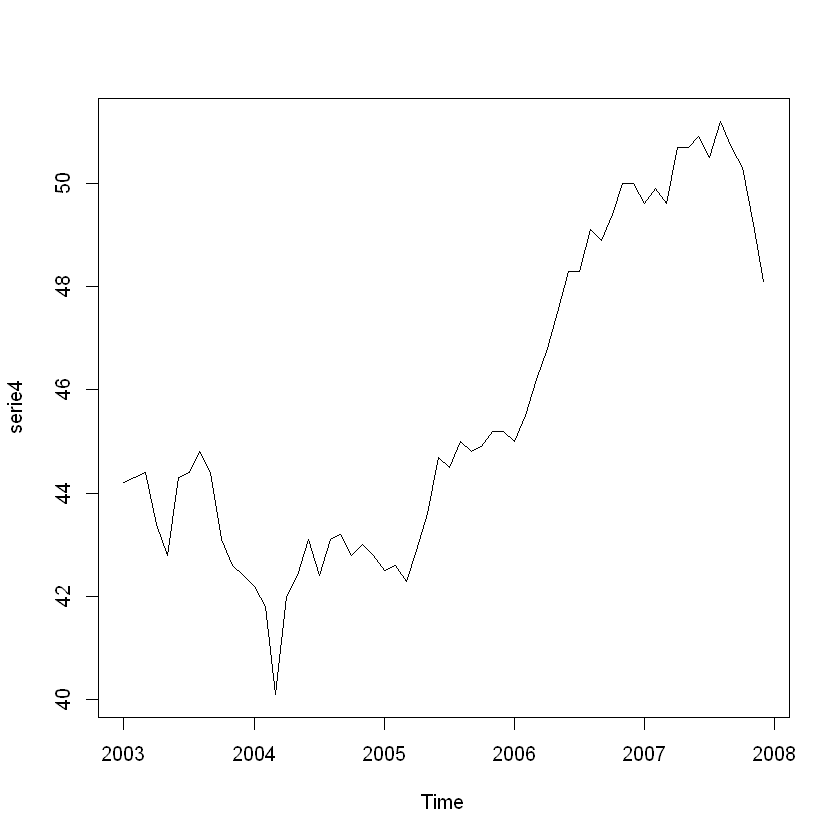

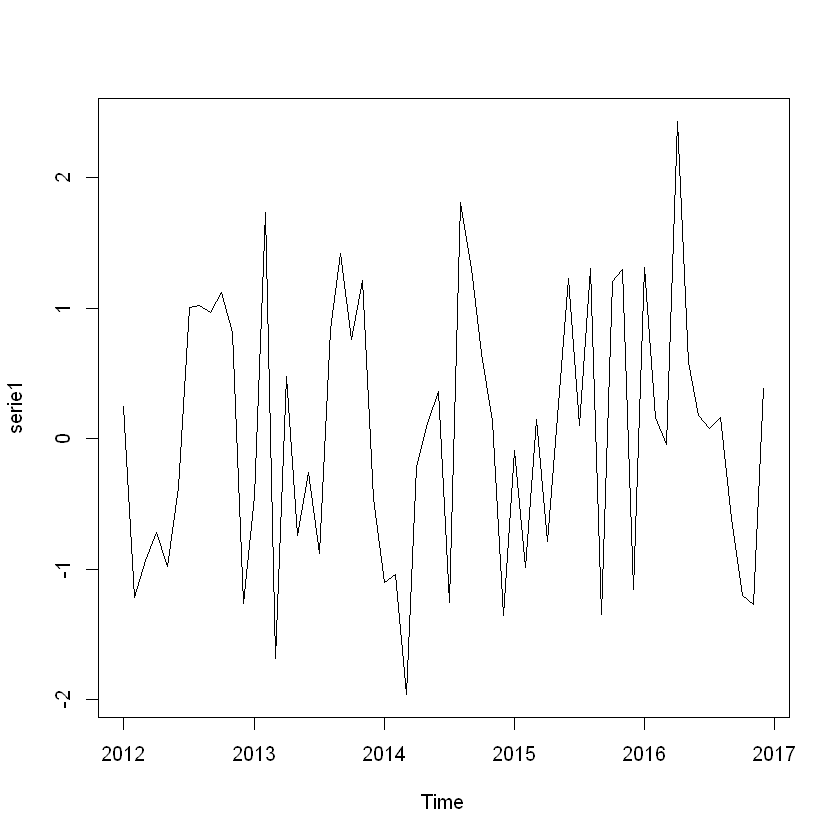

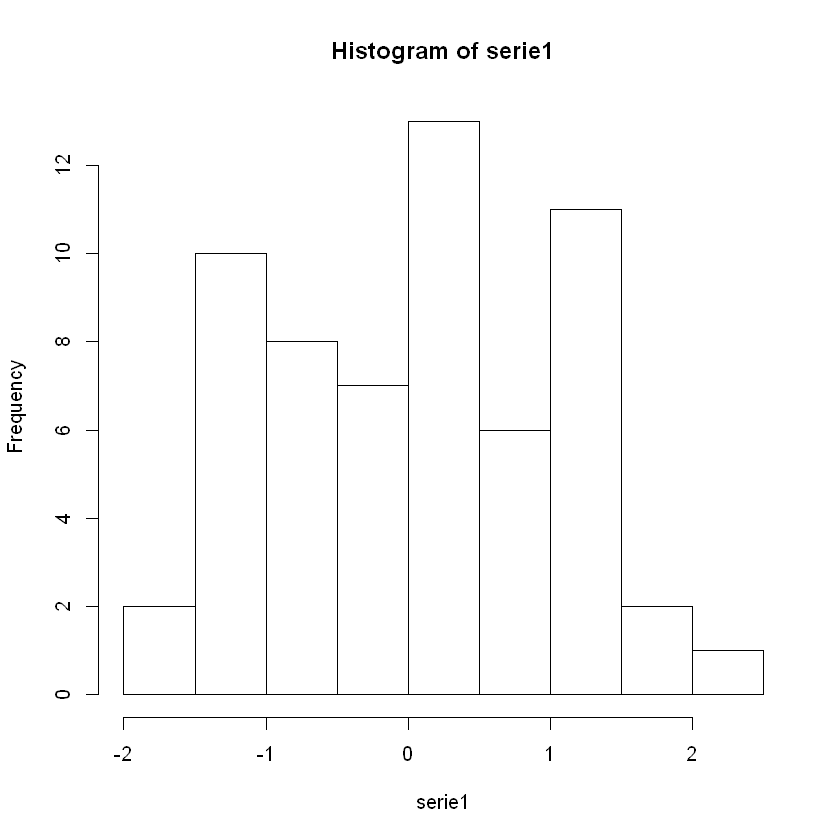

ERROR: Error in autoplot(serie1): non trovo la funzione "autoplot"


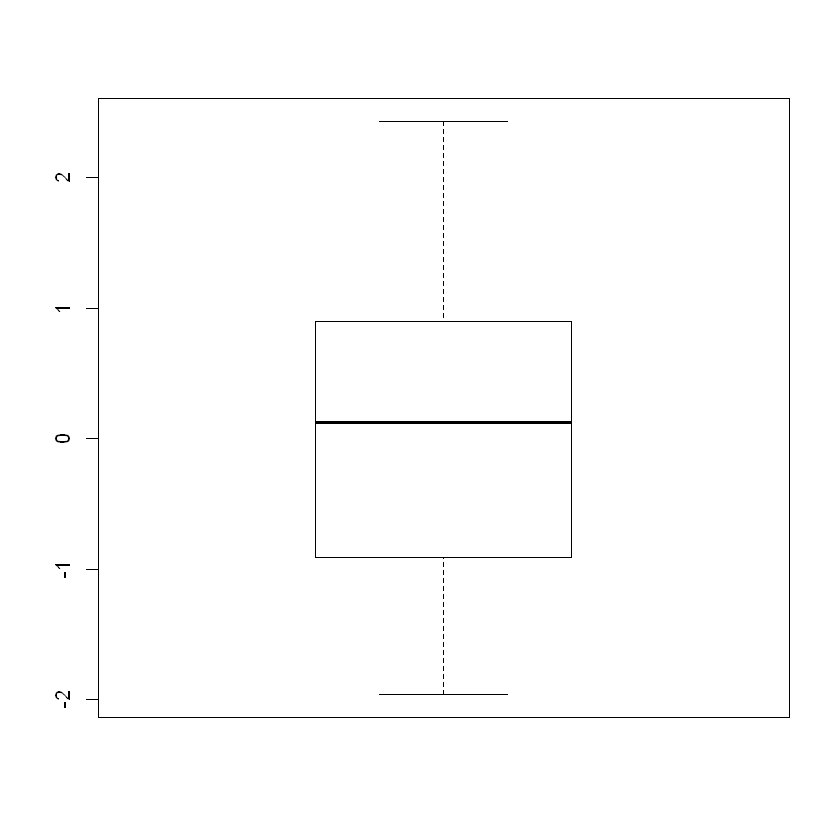

In [5]:

serie2 = ts(dados1$Comercio,start = c(2003,1), end=c(2007,12), frequency=12)
class(serie2)
plot(serie2)

serie3 = ts(dados1$Alimento,start = c(2003,1), end=c(2007,12), frequency=12)
class(serie3)
plot(serie3)

serie4 = ts(dados1$Metalurgia,start = c(2003,1), end=c(2007,12), frequency=12)
class(serie4)
plot(serie4)


#graficos do R



#graficos do R

plot(serie1)
hist(serie1)
boxplot(serie1)

#ggplot

autoplot(serie1)


#explorando parte da serie

serie2a = window(serie2,2003,c(2004,12))
plot(serie2a)
hist(serie2a)
boxplot(serie2)


#Modelo de média móvel



#calculando a media movel com ordem 3
seriemm1 = ma(serie4, order = 3 )
autoplot(seriemm1)

#calculando a media movel com ordem 5
seriemm2 = ma(serie4, order = 5 )
autoplot(seriemm2)


#novamente, ordem 12
seriemm3 = ma(serie4, order = 12 )
autoplot(seriemm3)


#comparando 
plot(serie4)
lines(seriemm1, col="red")
lines(seriemm2, col="blue")
lines(seriemm3, col="green")

#legenda
legend("topright",legend=c("Orig.","MM3", "MM5","MM12"), col = c("black","red","blue","green"), lty=1:2, cex=0.8,)


#alisamento exponencial Simples

modelo1 <- ets(serie4, "ANN")
modelo1

autoplot(modelo1$residuals)
autoplot(modelo1$fitted)

prev = forecast(modelo1, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial Duplo

modelo2 <- ets(serie2, "AAN")
modelo2

autoplot(modelo2$residuals)
autoplot(modelo2$fitted)

prev = forecast(modelo2, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial Duplo - Holt

modelo3 <- ets(serie2, "AAN")
modelo3

autoplot(modelo3$residuals)
autoplot(modelo3$fitted)

prev = forecast(modelo3, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial  - holt - Winters - Aditivo

modelo4 <- ets(serie2, "AAA")
modelo4

autoplot(modelo4$residuals)
autoplot(modelo4$fitted)

prev = forecast(modelo4, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial  - holt - Winters - Multiplicativo

modelo5 <- ets(serie2, "MAM")
modelo5

autoplot(modelo5$residuals)
autoplot(modelo5$fitted)

prev = forecast(modelo5, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial  - holt - Winters - Aditivo

modelo6 <- ets(serie3, "ANA")
modelo6

autoplot(modelo6$residuals)
autoplot(modelo6$fitted)

prev = forecast(modelo6, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)

#alisamento exponencial  - holt - Winters - Multiplicativo

modelo7 <- ets(serie3 ,"MNM")
modelo7

autoplot(modelo7$residuals)
autoplot(modelo7$fitted)

prev = forecast(modelo7, h=16,levels=c(85,90))
print(prev$mean)
autoplot(prev)


#comparando modelos


treino = window(serie2,2003,c(2005,12))
teste  = window(serie2,2006,c(2007,12))



#alisamento exponencial  - holt - Winters - Aditivo

modelo8 <- ets(treino, "AAA")
modelo8

autoplot(modelo8$residuals)
autoplot(modelo8$fitted)

prev1 = forecast(modelo8, h=24)
print(prev1$mean)
autoplot(prev1)

#alisamento exponencial  - holt - Winters - Multiplicativo

modelo9 <- ets(treino, "MAM")
modelo9

autoplot(modelo9$residuals)
autoplot(modelo9$fitted)

prev2 = forecast(modelo9, h=24)
print(prev2$mean)
autoplot(prev2)


#################################################################################

plot(serie2)
lines(prev1$mean, col="blue")
lines(prev2$mean, col="red")
lines(teste, col="green")
legend("topright",legend=c("AAA","MAM","Teste"), col = c("blue","red","green"), lty=1:2, cex=0.8)

accuracy(prev1,teste )
accuracy(prev2,teste )
